In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import h5py

filename = "2016-01-31--19-19-25.h5"
def readData(filename, start = 0, end = -1):

	camera_file = "/content/drive/My Drive/end to end nividia/data/camera/" + filename
	log_file = "/content/drive/My Drive/end to end nividia/data/log/" + filename

	print("Reading file ...")
	camera = h5py.File(camera_file, 'r')
	log = h5py.File(log_file, 'r')
	print("Done file")
	print(dict(log))

	images = camera['X'][()]
	steering_angle = log["steering_angle"][()]
	speed = log["speed"][()]
	idxs = np.linspace(0, steering_angle.shape[0]-1, images.shape[0]).astype("int")  # approximate alignment
	angles = steering_angle[idxs]
	speed = speed[idxs]

	#print(np.max(speed), np.min(speed))
	print("before",len(angles))

	good_steering = (np.abs(angles) < 180)
	good_velocity = speed > 5

	goods = good_steering * good_velocity
	good_images = images[goods]
	good_angles = angles[goods]
	good_speed = speed[goods]
	print("after",len(good_angles))
	good_images = good_images[start:end]
	good_angles = good_angles[start:end]
	good_speed = good_speed[start:end]

	camera.close()
	log.close()

	return good_images, good_angles, good_speed



def createVideo(images, angles, speed):

	# font
	font = cv2.FONT_HERSHEY_SIMPLEX 
	  
	# fontScale 
	fontScale = 1
	   
	# Blue color in BGR 
	color = (255, 255, 255) 
	  
	# Line thickness of 3 px 
	thickness = 3

	n_images = len(images)
	frameSize = (1280, 720)
	print("Creating video ...")
	out = cv2.VideoWriter('output_video.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 20, frameSize, True)

	for i in range(n_images):

	    img = images[i]
	    img = img.transpose(1,2,0)
	    img = cv2.resize(img, frameSize)
	    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
	    img = cv2.putText(img, 'Frame: '+str(i+1), (50, 50) , font, fontScale, color, thickness, cv2.LINE_AA)
	    img = cv2.putText(img, 'Steering angle: '+str(angles[i]), (50, 100) , font, fontScale, color, thickness, cv2.LINE_AA) 
	    img = cv2.putText(img, 'Speed: '+str(speed[i]), (50, 150) , font, fontScale, color, thickness, cv2.LINE_AA)   
	    print("Frame:", str(i+1)+"/"+str(n_images))
	    out.write(img)

	out.release()





images, angles, speed = readData(filename)
#createVideo(images, angles, speed)

Reading file ...
Done file
{'UN_D_cam1_ptr': <HDF5 dataset "UN_D_cam1_ptr": shape (19732,), type "<i8">, 'UN_D_cam2_ptr': <HDF5 dataset "UN_D_cam2_ptr": shape (19735,), type "<i8">, 'UN_D_camphone_ptr': <HDF5 dataset "UN_D_camphone_ptr": shape (19693,), type "<i8">, 'UN_D_lidar_ptr': <HDF5 dataset "UN_D_lidar_ptr": shape (1785062,), type "<i8">, 'UN_D_radar_msg': <HDF5 dataset "UN_D_radar_msg": shape (241749, 7), type "<f8">, 'UN_D_rawgps': <HDF5 dataset "UN_D_rawgps": shape (41287,), type "|S302">, 'UN_T_cam1_ptr': <HDF5 dataset "UN_T_cam1_ptr": shape (19732,), type "<f8">, 'UN_T_cam2_ptr': <HDF5 dataset "UN_T_cam2_ptr": shape (19735,), type "<f8">, 'UN_T_camphone_ptr': <HDF5 dataset "UN_T_camphone_ptr": shape (19693,), type "<f8">, 'UN_T_lidar_ptr': <HDF5 dataset "UN_T_lidar_ptr": shape (1785062,), type "<f8">, 'UN_T_radar_msg': <HDF5 dataset "UN_T_radar_msg": shape (241749,), type "<f8">, 'UN_T_rawgps': <HDF5 dataset "UN_T_rawgps": shape (41287,), type "<f8">, 'blinker': <HDF5 datas

In [ ]:
import numpy as np
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

In [ ]:
my_transform = transforms.Compose([
                                   transforms.ToPILImage(),
                                   transforms.ColorJitter(brightness = (3,6)),
                                   transforms.Resize(size = (66,200)),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                  ])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


15404
(3, 160, 320)
27.6116404334064
(160, 320, 3)
this is the size 2366054400
this is the lenth 15404


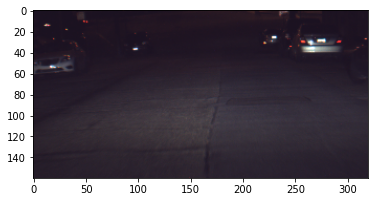

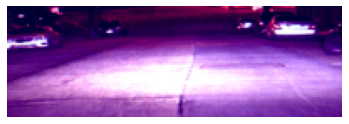

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
#try1 = my_transform(images[5000])
#imshow(try1 , normalize=False)
print(len(images))
print(images[0].shape)
im = images[50].transpose(1,2,0)
print(angles[50])
print(im.shape)
plt.imshow(im)
im2 = my_transform(im)
imshow(im2 , normalize=False)
print('this is the size',images.size)
print('this is the lenth',len(images))

In [ ]:
trans = lambda im: my_transform(cv2.cvtColor(im.transpose(1,2,0), cv2.COLOR_BGR2YUV))
final_data = torch.empty([15404,3,66,200],dtype=torch.float64)
for i,img in enumerate(images):
  final_data[i] = trans(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


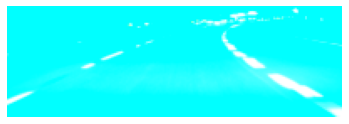

In [ ]:
imshow(final_data[9600] , normalize=False)

In [ ]:
angles = torch.Tensor(angles)
train_im = final_data[0:int(len(final_data) * 0.8)]
valid_im = final_data[int(len(final_data) * 0.8):int(len(final_data) * 0.95 )]
test_im = final_data[int(len(final_data) * 0.95):]

train_ang = angles[0:int(len(final_data) * 0.8)]
valid_ang = angles[int(len(final_data) * 0.8):int(len(final_data) * 0.95 )]
test_ang = angles[int(len(final_data) * 0.95):]


print(len(train_im))
print(len(valid_im))
print(len(test_im))

print('______________________________________________')

print(len(train_ang))
print(len(valid_ang))
print(len(test_ang))

print('______________________________________________')

print(len(images))
print(len(angles))
print(len(final_data))

12323
2310
771
______________________________________________
12323
2310
771
______________________________________________
15404
15404
15404


In [ ]:
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torchvision.transforms as transforms
train_dataset = TensorDataset(train_im,train_ang)
valid_dataset = TensorDataset(valid_im,valid_ang)
test_dataset = TensorDataset(test_im,test_ang)
data_loader_train = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=False, num_workers=0)
data_loader_valid = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=32, shuffle=False, num_workers=0)
data_loader_test = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=1, shuffle=False, num_workers=0)


loaders_scratch = {'train':data_loader_train ,'test':data_loader_test ,'valid':data_loader_valid}

In [ ]:
import torch.nn as nn

class DriverNet(nn.Module):

  def __init__(self):
        super(DriverNet, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 24, kernel_size=5, stride=2),
            nn.ELU(),
            nn.Conv2d(24, 36, kernel_size=5, stride=2),
            nn.ELU(),
            nn.Conv2d(36, 48, kernel_size=5, stride=2),
            nn.ELU(),
            nn.Conv2d(48, 64, kernel_size=3, stride=1),
            nn.ELU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ELU(),
            nn.Dropout(p=0.5)
        )
        self.linear_layers = nn.Sequential(
            nn.Linear(in_features=64*1*18, out_features=100),
            nn.ELU(),
            nn.Dropout(p=0.4),
            nn.Linear(in_features=100, out_features=64),
            nn.ELU(),
            nn.Linear(in_features=64, out_features=10),
            nn.ELU(),
            nn.Linear(in_features=10, out_features=1)
        )
        

  def forward(self, x):
      #x = x.view(x.size(0), 3, 66, 200)
      output = self.conv_layers(x)
      output = output.view(output.size(0), -1)
      output = self.linear_layers(output)
      return output
model = DriverNet()

In [ ]:
model.load_state_dict(torch.load('/content/drive/My Drive/end to end nividia/data/model00.pt'))

<All keys matched successfully>

In [ ]:
import torch.optim as optim

### TODO: select loss function
criterion = nn.MSELoss()

### TODO: select optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.0001)

use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    model = model.cuda()

In [ ]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.float().cuda(), target.cuda()
            optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
        # calculate the batch loss
            loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
        # perform a single optimization step (parameter update)
            optimizer.step()
        # update training loss
            train_loss += loss.item()*data.size(0)
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.float().cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
        # calculate the batch loss
            loss = criterion(output, target)
        # update average validation loss 
            valid_loss += loss.item()*data.size(0)
            
        # print training/validation statistics
        train_loss = train_loss/len(loaders['train'].sampler)
        valid_loss = valid_loss/len(loaders['valid'].sampler)

        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        
    return model

In [ ]:
model_scratch = train(110, loaders_scratch, model, optimizer, 
                      criterion, use_cuda, '/content/drive/My Drive/end to end nividia/data/model29.1.pt')

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([53])) that is different to the input size (torch.Size([53, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, 

Epoch: 1 	Training Loss: 536.526485 	Validation Loss: 57.225654
Epoch: 2 	Training Loss: 310.278756 	Validation Loss: 85.372960
Epoch: 3 	Training Loss: 273.079965 	Validation Loss: 67.168384
Epoch: 4 	Training Loss: 212.443599 	Validation Loss: 70.396831
Epoch: 5 	Training Loss: 199.950012 	Validation Loss: 73.243824
Epoch: 6 	Training Loss: 187.108209 	Validation Loss: 78.940725
Epoch: 7 	Training Loss: 179.625762 	Validation Loss: 73.138671
Epoch: 8 	Training Loss: 173.720560 	Validation Loss: 79.026349
Epoch: 9 	Training Loss: 169.458730 	Validation Loss: 74.716202
Epoch: 10 	Training Loss: 163.109398 	Validation Loss: 79.456609
Epoch: 11 	Training Loss: 161.984081 	Validation Loss: 82.230233
Epoch: 12 	Training Loss: 157.323850 	Validation Loss: 82.183596
Epoch: 13 	Training Loss: 154.502022 	Validation Loss: 82.964626
Epoch: 14 	Training Loss: 149.566206 	Validation Loss: 85.568604
Epoch: 15 	Training Loss: 149.202125 	Validation Loss: 95.054246
Epoch: 16 	Training Loss: 144.9405

In [ ]:
path = '/content/drive/My Drive/end to end nividia/data/model29_2.pt'
torch.save(model.state_dict(), path)

In [ ]:
out = []
model.eval()
for batch_idx, (data, target) in enumerate(loaders_scratch['test']):
  # move to GPU
        if use_cuda:
            data, target = data.float().cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        out.append(output)

In [ ]:
acc = []
for i in range(len(test_ang)):
  acc.append(((abs(out[i][0][0] - test_ang[i]) / test_ang[i])) * 100)
print(acc[:5])

[tensor(66.1963, device='cuda:0', grad_fn=<MulBackward0>), tensor(73.5072, device='cuda:0', grad_fn=<MulBackward0>), tensor(74.6717, device='cuda:0', grad_fn=<MulBackward0>), tensor(74.2587, device='cuda:0', grad_fn=<MulBackward0>), tensor(69.8635, device='cuda:0', grad_fn=<MulBackward0>)]


In [ ]:
k = 0
for i in range(len(test_ang)):
  k = acc[i] + k
print(len(test_ang))
print(1 - (k / len(test_ang)))

771
tensor(-inf, device='cuda:0', grad_fn=<RsubBackward1>)
